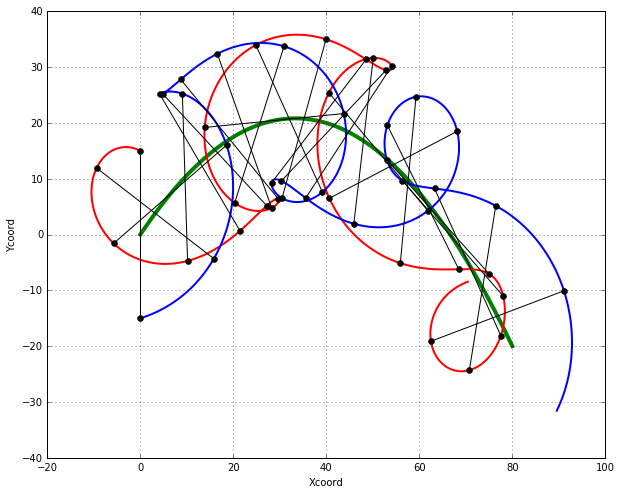

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

class body:
    def __init__(self, x0, y0, vx0, vy0, w0, E = 0, angle0 = 0, g = 0): #g = 0 - zero gravity
        self.x0 = x0
        self.y0 = y0
        self.vx0 = vx0
        self.vy0 = vy0
        self.w0 = w0
        self.E = E
        self.angle0 = angle0
        self.g = g
    
class dumbbell(body):
    def __init__(self, x0, y0, vx0, vy0, w0, m, r, l, q, time, E = 0, g = 0, angle0 = 0): #l - расстояние между центром стержня и центром шара
        body.__init__(self, x0, y0, vx0, vy0, w0, E, angle0, g)
        self.r = r
        self.l = l
        self.q = q
        self.time = time
        self.angles = np.zeros(len(time))
        self.k = 2.0*l*q*E/(m*r**2 + 2*m*l**2)
        self.angle_calc()
        
    def get_x(self):
        return self.x0 + self.vx0*self.time
    
    def get_y(self):
        return self.y0 + self.vy0*self.time - self.g*time**2
    
    def f(self, phi0_u0, t, k):
        phi, u = phi0_u0
        return [u, k*np.sin(phi)]
    
    def angle_calc(self):
        self.angles = odeint(self.f, [angle0, self.w0], self.time, args = (self.k,))[:, 0]
        
    def get_angles(self):
        return self.angles

class Plotter: 
    def __init__(self, title, xlabel, ylabel):
        self.fig = plt.figure(figsize=(10,8))
        self.pl = self.fig.add_subplot(111)
        self.pl.set_title(title)
        self.pl.set_xlabel(xlabel)
        self.pl.set_ylabel(ylabel)
        self.pl.grid(1)

    def plot(self, x, y, angle, t, l):
        self.pl.plot(x, y, color = 'green', linewidth=4.0,  label="center")
        self.pl.plot(x + l*np.cos(angle),y + l*np.sin(angle), color = 'red', linewidth=2.0, label="+charge")
        self.pl.plot(x - l*np.cos(angle),y - l*np.sin(angle), color = 'blue', linewidth=2.0, label="-charge")
        
        shift = 40
        
        sections = [[x[::shift] + l*np.cos(angle[::shift]), x[::shift] - l*np.cos(angle[::shift])],
                   [y[::shift] + l*np.sin(angle[::shift]), y[::shift] - l*np.sin(angle[::shift])]]
    
        for i in range(len(t)/shift):
            self.pl.plot([x[i*shift] + l*np.cos(angle[i*shift]), x[i*shift] - l*np.cos(angle[i*shift])],
                         [y[i*shift] + l*np.sin(angle[i*shift]), y[i*shift] - l*np.sin(angle[i*shift])],
                         color = (0,0,0), marker = "o")
                        #color = (1 - i*1.0*shift/len(t),1 - i*1.0*shift/len(t),1 - i*1.0*shift/len(t)), marker = "o")

        #self.pl.plot(t, x, color = 'yellow', label="center")
        #self.pl.plot(t, x + l*np.cos(angle), color = 'red', label="+charge")
        #self.pl.plot(t, x - l*np.cos(angle), color = 'blue', label="-charge")

    def show(self):
        plt.show()
    
    
time = np.linspace(0, 10, 1001)

x0, y0, vx0, vy0, w0, m, r, l, q, time, E, g, angle0 = (0., 0., 4., 5., 1, 1., 1., 15., 1., np.linspace(0, 20, 1001), 10, 0.3, np.pi/2)
d = dumbbell(x0, y0, vx0, vy0, w0, m, r, l, q, time, E, g, angle0)

#d.angle_calc()

#print d.get_x()
#print d.get_y()
#print d.get_angles()

P = Plotter('', 'Xcoord', 'Ycoord')
P.plot(d.get_x(), d.get_y(), d.get_angles(), time, l)
P.show()
